# Clustering - Ouray County Parcel Risk
**Author:** Bryce A Young  
**Created:** 2025-01-17 | 
**Modified:** 2025-01-17  

#### Overview
In this notebook, I do two things: 
1. I use unsupervized learning models to cluster home types **without** risk score as a variable. I then draw comparisons between clusters and average risk scores. 
2. I use PCA and t-SNE to reduce the dimensionality of the dataset to derive home archetypes and test the reduced dataset with supervized risk prediction methods.

*NOTE: Clustering effectively groups homes into archetypes, then we can go back and assign archetypes to homes and assess how many of those homes burned in historic fires such as Palisades, Eaton, Lahaina, Marshall, and Camp.*

## Environment Setup
---

In [4]:
# setup environment
import os
### Directory ###
# Repository
os.chdir(r'D:/_PROJECTS/P001_OurayParcel/ouray')
# Root workspace
ws = r'D:/_PROJECTS/P001_OurayParcel'

### Data paths ###
# Folder where all the data inputs and outputs will live
data = os.path.join(ws, 'data')
# Scratch folder for intermediate files
scratch = os.path.join(data, '_temp')
# Any final outputs go here
out = os.path.join(data, '_out')
# Figures to export
figs = os.path.join(out, 'figures')

# correct working directory
os.getcwd()

'D:\\_PROJECTS\\P001_OurayParcel\\ouray'

## Clustering
---
Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples.

In [13]:
import pandas as pd
df = pd.read_csv(os.path.join(scratch, 'MAIN_20250303.csv'))
pd.set_option('display.max_columns', None)
df.head()

,rwra_index,feat_index,parcel_num,Year,address,ParcelNum,Model,Address_Visible,Driveway_Clearance,Driveway_Lenth,Dist_to_Danger_Topo,Slope_Final,Background_Fuels,Defensible_Space,Roofing_Material,Building_Exterior,Other_Combustibles,Decks_and_Fencing,Proximity_to_Neighboring_Home,Ingress_Egress,Score_Final,Risk_Rating,County,wui_class,min_ssd,mean_cc0_2m,mean_cc2_4m,mean_cc4_8m,mean_cc8_40m,intersections,PARCELNB,ACCOUNT,ACRES_calc,hiz_ext_out,tax_AIRC,tax_ARCH,tax_SQFT,tax_COND,tax_EYB,tax_EXW_PERCENT,tax_EXW,tax_FLR,tax_FRME,tax_HTFL,tax_INT,tax_RMS,tax_RCVR,tax_RSTR,Type,sum_cc,tax_WBL,tax_DGR,tax_PTO,tax_OPP,Risk_Rating_new,At_Least_8_Unobserved
0,0,2836,430506210001,2013.0,123 EXAMPLE DRIVE,430506210001,A,0,5,NaN,0,NaN,75,75,0,0,10,50,NaN,10,225.0,High,Ouray County,1,31.525324,0.028983,0.080487,0.112609,0.179108,1,430506210001,R003918,49.6527,True,1 - NONE,COMMERCIAL,6991.1,3 - GOOD,2015.0,10.0,CONC/MSNRY,CONC/MSNRY,WOOD,PROPANE,DRYWALL,0.776148,METAL,GABLE,Commercial,0.401187,NaN,NaN,NaN,Large,Moderate,False
1,1,1110,430506210001,2013.0,129 EXAMPLE DRIVE,430506210001,A,0,5,NaN,0,NaN,50,50,0,20,10,0,NaN,0,135.0,Low,Ouray County,1,31.525324,0.051442,0.096132,0.093393,0.155315,1,430506210001,R003918,49.6527,False,1 - NONE,COMMERCIAL,6991.1,3 - GOOD,2015.0,10.0,CONC/MSNRY,CONC/MSNRY,WOOD,PROPANE,DRYWALL,0.776148,METAL,GABLE,Commercial,0.396283,NaN,NaN,NaN,Large,Low,False
2,2,3672,430506210001,2013.0,135 EXAMPLE DRIVE,430506210001,A,0,5,NaN,75,NaN,50,100,0,60,10,50,NaN,10,360.0,Extreme,Ouray County,1,66.164004,0.035089,0.059277,0.031211,0.026098,0,430506210001,R003918,49.6527,True,1 - NONE,COMMERCIAL,6991.1,3 - GOOD,2015.0,10.0,CONC/MSNRY,CONC/MSNRY,WOOD,PROPANE,DRYWALL,0.776148,METAL,GABLE,Commercial,0.151675,NaN,NaN,NaN,Large,Moderate,False
3,3,3843,430506210001,2013.0,141 EXAMPLE DRIVE,430506210001,A,0,0,NaN,0,NaN,50,75,200,60,30,0,NaN,0,415.0,Extreme,Ouray County,1,78.033957,0.054498,0.065344,0.076959,0.213781,0,430506210001,R003918,49.6527,False,1 - NONE,COMMERCIAL,6991.1,3 - GOOD,2015.0,10.0,CONC/MSNRY,CONC/MSNRY,WOOD,PROPANE,DRYWALL,0.776148,METAL,GABLE,Commercial,0.410582,NaN,NaN,NaN,Large,High,False
4,5,921,403935100181,2017.0,416 COUNTY ROAD 22A,403935100181,B,5,0,11.0,0,0.0,10,50,0,0,0,0,0.0,0,76.0,Low,Ouray County,1,211.505051,0.048738,0.084885,0.034318,0.000000,0,403935100181,R000531,32.7283,False,1 - NONE,SINGLE STORY,4034.9,3 - GOOD,2015.0,100.0,CONC/MSNRY,WDJST,WOOD,GAS,DRYWALL,0.776148,ASPHALT,GABLE,Residence,0.167940,NaN,NaN,Large,Large,Low,False


In [14]:
# There are NaN values that we want to change to string values that say 'None'
cols2fix = ['tax_OPP', 'tax_DGR', 'tax_WBL', 'tax_PTO']
df[cols2fix] = df[cols2fix].fillna('None')

# Let's drop the 4 rows where Model == 'A'
df = df[df['Model'] != 'A']
print(df.shape)
df.head()

(1396, 56)


,rwra_index,feat_index,parcel_num,Year,address,ParcelNum,Model,Address_Visible,Driveway_Clearance,Driveway_Lenth,Dist_to_Danger_Topo,Slope_Final,Background_Fuels,Defensible_Space,Roofing_Material,Building_Exterior,Other_Combustibles,Decks_and_Fencing,Proximity_to_Neighboring_Home,Ingress_Egress,Score_Final,Risk_Rating,County,wui_class,min_ssd,mean_cc0_2m,mean_cc2_4m,mean_cc4_8m,mean_cc8_40m,intersections,PARCELNB,ACCOUNT,ACRES_calc,hiz_ext_out,tax_AIRC,tax_ARCH,tax_SQFT,tax_COND,tax_EYB,tax_EXW_PERCENT,tax_EXW,tax_FLR,tax_FRME,tax_HTFL,tax_INT,tax_RMS,tax_RCVR,tax_RSTR,Type,sum_cc,tax_WBL,tax_DGR,tax_PTO,tax_OPP,Risk_Rating_new,At_Least_8_Unobserved
4,5,921,403935100181,2017.0,416 COUNTY ROAD 22A,403935100181,B,5,0,11.0,0,0.0,10,50,0,0,0,0,0.0,0,76.0,Low,Ouray County,1,211.505051,0.048738,0.084885,0.034318,0.00000,0,403935100181,R000531,32.728300,False,1 - NONE,SINGLE STORY,4034.9,3 - GOOD,2015.0,100.0,CONC/MSNRY,WDJST,WOOD,GAS,DRYWALL,0.776148,ASPHALT,GABLE,Residence,0.167940,None,None,Large,Large,Low,False
5,6,509,403926423002,2017.0,3100 COUNTY ROAD 22,403926423002,B,15,0,11.0,0,0.0,10,0,0,0,80,0,0.0,0,116.0,Low,Ouray County,3,180.054332,0.023967,0.015273,0.000271,0.00004,0,403926423002,R005599,9.707660,False,1 - NONE,MULTI STORY,1942.0,2 - VERY GOOD,2010.0,100.0,CONC/MSNRY,WDJST,WOOD,GAS,DRYWALL,0.776148,METAL,GABLE,Residence,0.039551,Small,None,None,Small,Low,False
6,7,1296,403926300151,2017.0,3245 COUNTY ROAD 22,403926300151,B,0,0,11.0,0,0.0,20,50,0,0,0,0,100.0,0,181.0,Low,Ouray County,1,5.979973,0.032157,0.101354,0.136954,0.00000,1,403926300151,R004277,0.822618,True,1 - NONE,COMMERCIAL,1579.0,4 - AVERAGE,2000.0,100.0,METAL,CONC/MSNRY,WOOD,STOVE,DRYWALL,0.000000,METAL,MANSARD,Commercial,0.270465,None,None,None,None,Low,False
7,8,727,403936300089,2017.0,4452 COUNTY ROAD 1,403936300089,B,5,5,11.0,0,0.0,10,0,0,70,0,100,50.0,0,251.0,Moderate,Ouray County,3,20.479874,0.025695,0.047097,0.039426,0.00012,1,403936300089,R004198,38.439600,False,1 - NONE,MULTI STORY,2865.0,3 - GOOD,2000.0,100.0,WOOD,WDJST,WOOD,STOVE,DRYWALL,0.000000,METAL,GABLE,Residence,0.112337,None,None,None,None,Moderate,False
8,9,1332,403935200086,2017.0,3479 COUNTY ROAD 22,403935200086,B,5,5,11.0,0,0.0,10,0,0,70,80,0,0.0,0,181.0,Low,Ouray County,5,100.486083,0.018661,0.045186,0.068360,0.00000,0,403935200086,R004237,12.296800,True,1 - NONE,MULTI STORY,1696.0,3 - GOOD,2000.0,100.0,WOOD,WDJST,WOOD,ELECTRIC,DRYWALL,0.000000,ASPHALT,GABLE,Residence,0.132208,None,None,None,Small,Low,False


In [15]:
df.columns

Index(['rwra_index', 'feat_index', 'parcel_num', 'Year', 'address',
       'ParcelNum', 'Model', 'Address_Visible', 'Driveway_Clearance',
       'Driveway_Lenth', 'Dist_to_Danger_Topo', 'Slope_Final',
       'Background_Fuels', 'Defensible_Space', 'Roofing_Material',
       'Building_Exterior', 'Other_Combustibles', 'Decks_and_Fencing',
       'Proximity_to_Neighboring_Home', 'Ingress_Egress', 'Score_Final',
       'Risk_Rating', 'County', 'wui_class', 'min_ssd', 'mean_cc0_2m',
       'mean_cc2_4m', 'mean_cc4_8m', 'mean_cc8_40m', 'intersections',
       'PARCELNB', 'ACCOUNT', 'ACRES_calc', 'hiz_ext_out', 'tax_AIRC',
       'tax_ARCH', 'tax_SQFT', 'tax_COND', 'tax_EYB', 'tax_EXW_PERCENT',
       'tax_EXW', 'tax_FLR', 'tax_FRME', 'tax_HTFL', 'tax_INT', 'tax_RMS',
       'tax_RCVR', 'tax_RSTR', 'Type', 'sum_cc', 'tax_WBL', 'tax_DGR',
       'tax_PTO', 'tax_OPP', 'Risk_Rating_new', 'At_Least_8_Unobserved'],
      dtype='object')

In [16]:
pred_cols = [
    'wui_class', 'min_ssd', 'mean_cc0_2m',
       'mean_cc2_4m', 'mean_cc4_8m', 'mean_cc8_40m', 'intersections',
       'ACRES_calc', 'hiz_ext_out',
       'tax_ARCH', 'tax_SQFT', 'tax_EYB', 'tax_EXW_PERCENT',
       'tax_EXW', 'tax_HTFL', 'tax_RMS',
       'tax_RCVR', 'tax_RSTR', 'Type', 'sum_cc', 'tax_WBL', 'tax_DGR',
       'tax_PTO', 'tax_OPP'
]

In [1]:
################################
# Load the data
################################
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

# Create / load the datasets:
n_samples = 1500
X0, _ = make_blobs(n_samples=n_samples, centers=2, n_features=2, random_state=0)
X1, _ = make_blobs(n_samples=n_samples, centers=5, n_features=2, random_state=0)

random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, cluster_std=1.3)
transformation = [[0.6, -0.6], [-0.2, 0.8]]
X2 = np.dot(X, transformation)
X3, _ = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
X4, _ = make_moons(n_samples=n_samples, noise=.12)

X = [X0, X1, X2, X3, X4]
# The datasets are X[i], where i ranges from 0 to 4

In [2]:
################################
# Code to plot clusters
################################
def plot_cluster(ax, data, cluster_assignments):
    '''Plot two-dimensional data clusters
    
    Parameters
    ----------
    ax : matplotlib axis
        Axis to plot on
    data : list or numpy array of size [N x 2] 
        Clustered data
    cluster_assignments : list or numpy array [N]
        Cluster assignments for each point in data

    '''
    clusters = np.unique(cluster_assignments)
    n_clusters = len(clusters)
    for ca in clusters:
        kwargs = {}
        if ca == -1:
            # if samples are not assigned to a cluster (have a cluster assignment of -1, color them gray)
            kwargs = {'color':'gray'}
            n_clusters = n_clusters - 1
        ax.scatter(data[cluster_assignments==ca, 0], data[cluster_assignments==ca, 1],s=5,alpha=0.5, **kwargs)
        ax.set_xlabel('feature 1')
        ax.set_ylabel('feature 2')
        ax.set_title(f'No. Clusters = {n_clusters}')
        ax.axis('equal')

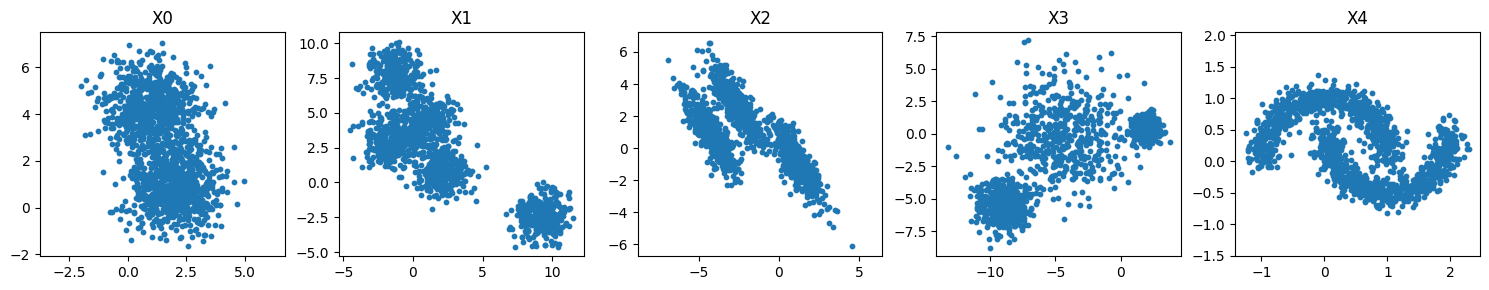

In [3]:
# Set up subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Plot each dataset in a separate subplot
for i, (dataset, title) in enumerate(zip(X, ["X0", "X1", "X2", "X3", "X4"])):
    axes[i].scatter(dataset[:, 0], dataset[:, 1], s=10)
    axes[i].set_title(title)
    axes[i].axis('equal')  # Set equal scaling for better visualization

# Adjust layout
plt.tight_layout()
plt.show()

Now that we have viewed the basic shape of the data, we can create elbow curves for each dataset to determine what $k$ value to set for k-means clustering. (Refer to machine learning assignment 5)

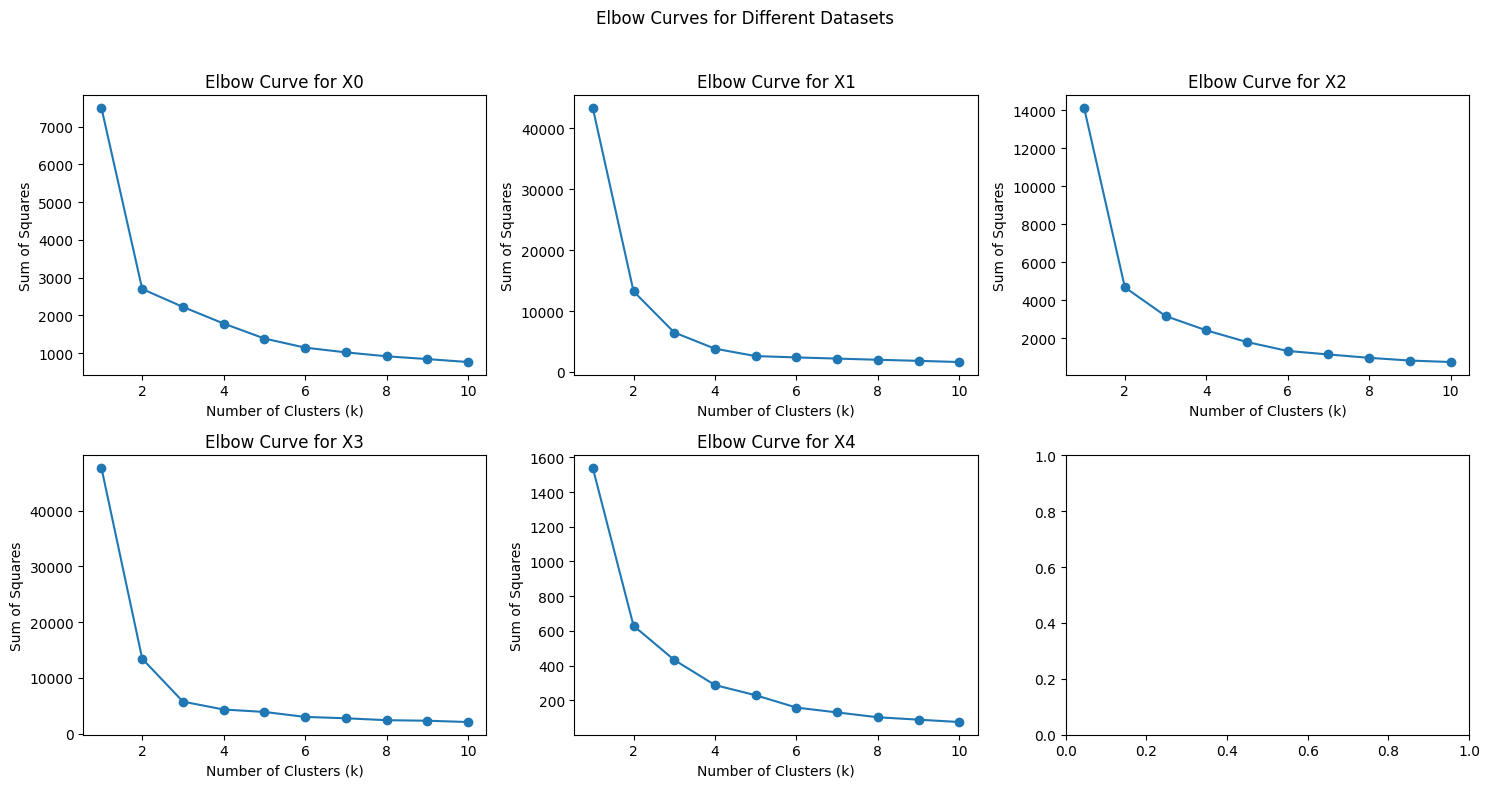

In [5]:
from sklearn.cluster import KMeans
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Elbow Curves for Different Datasets')

# Create an inertia list for each dataset
for i, dataset in enumerate(X):
    sumsqs = []
    
    # Iterate through cluster sizes and calculate inertia, appending to inertia list   
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(dataset)
        sumsqs.append(kmeans.inertia_)
        
    # Plot the elbow curve on the corresponding subplot
    row = i // 3
    col = i % 3
    axes[row, col].plot(range(1, 11), sumsqs, marker='o')
    axes[row, col].set_title(f'Elbow Curve for X{i}')
    axes[row, col].set_xlabel('Number of Clusters (k)')
    axes[row, col].set_ylabel('Sum of Squares')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Now we can plot the cluster assignments.

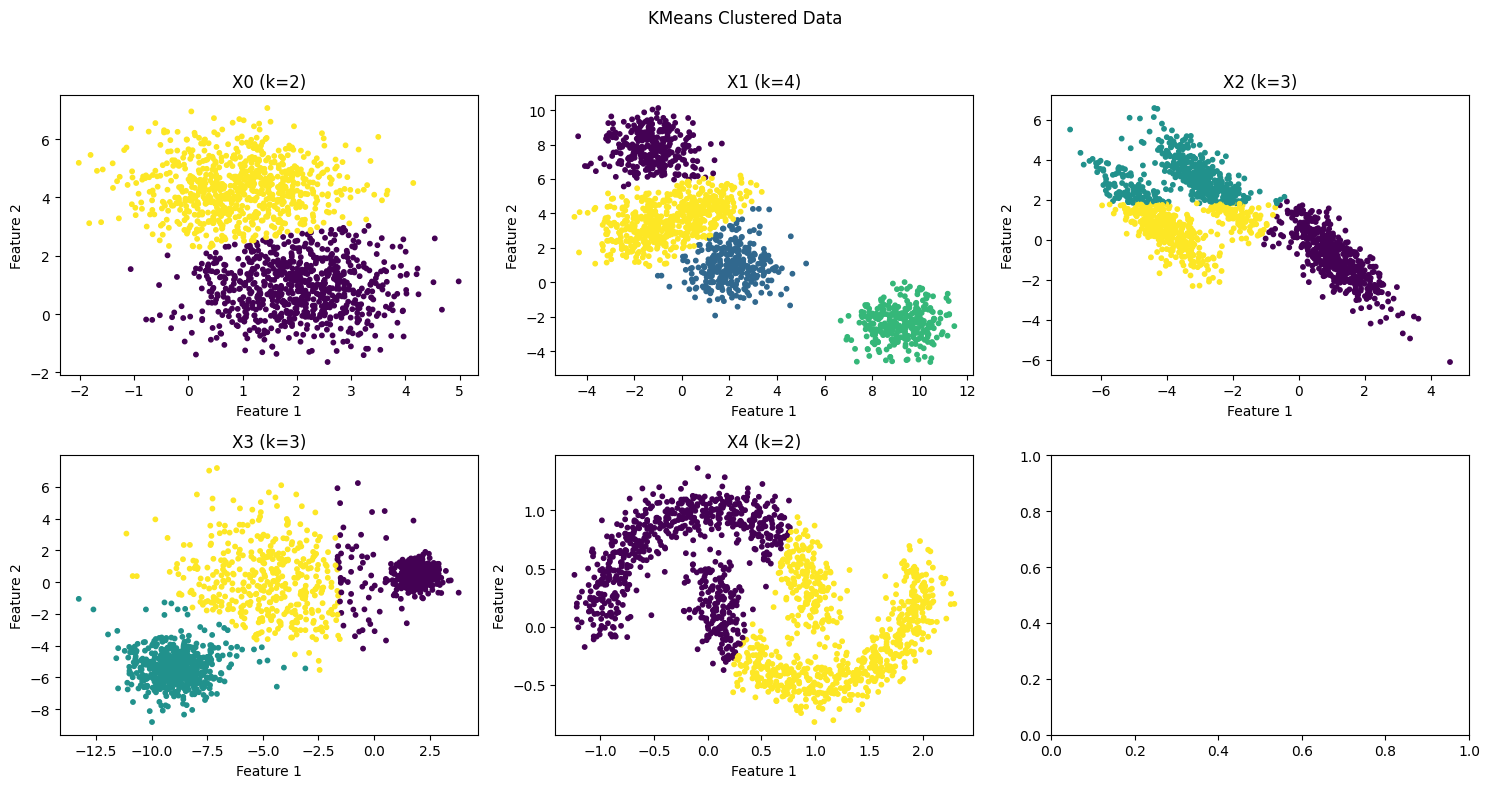

In [6]:
#### K MEANS CLUSTERING ####

# List of best k values for each dataset
best_kmeans = [2, 4, 3, 3, 2]

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('KMeans Clustered Data')

# Iterate over datasets and corresponding best k values
for i, (dataset, best_k) in enumerate(zip(X, best_kmeans)):
    # Fit the specified k-means model
    kmeans = KMeans(n_clusters=best_k, random_state=0)
    cluster_assignments = kmeans.fit_predict(dataset)
    
    # Plot the clustered data on the corresponding subplot
    row = i // 3
    col = i % 3
    axes[row, col].scatter(dataset[:, 0], dataset[:, 1], c=cluster_assignments, cmap='viridis', s=10)
    axes[row, col].set_title(f'X{i} (k={best_k})')
    axes[row, col].set_xlabel('Feature 1')
    axes[row, col].set_ylabel('Feature 2')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

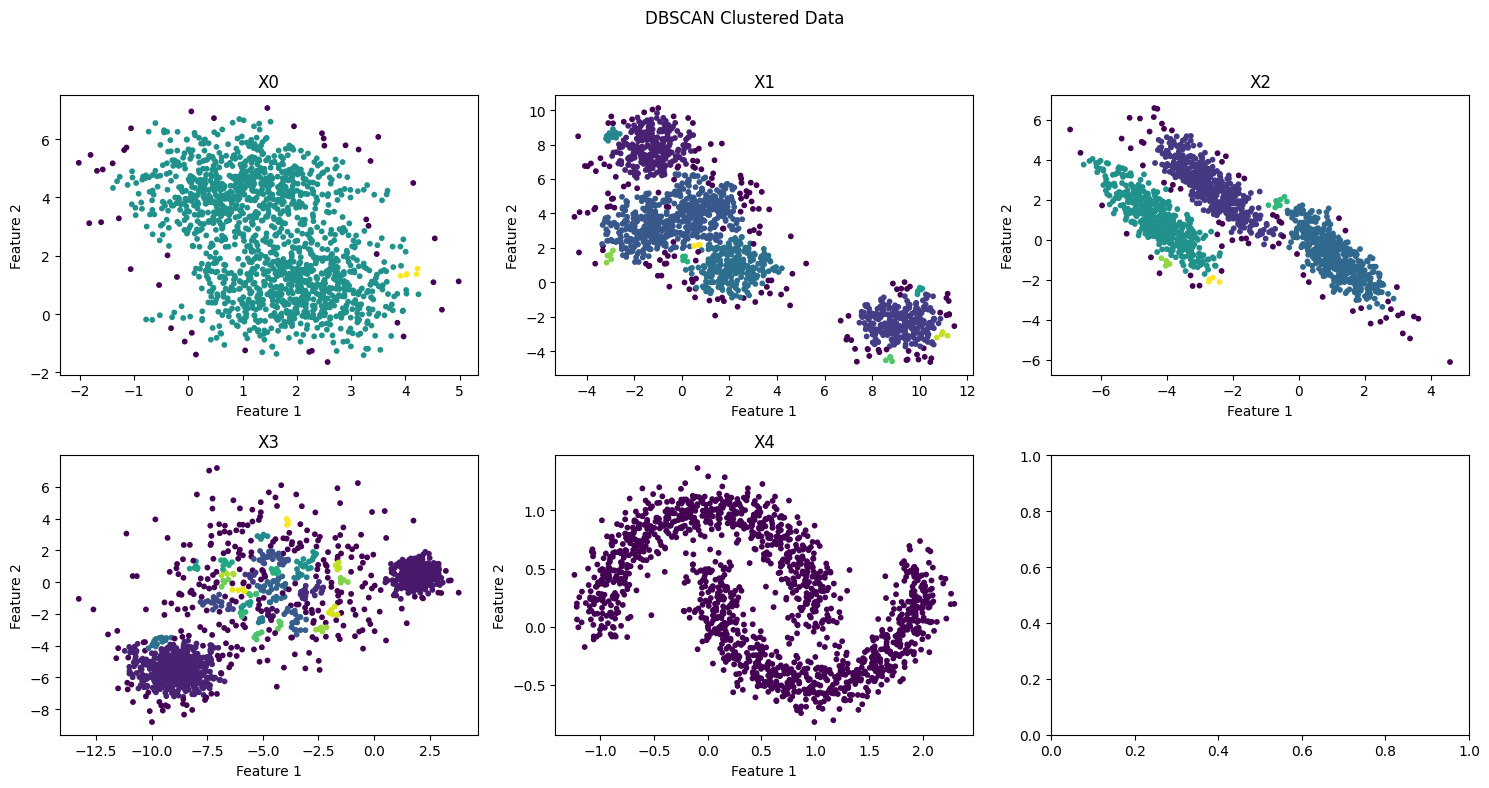

In [7]:
#### DBSCAN CLUSTERING ####

from sklearn.cluster import DBSCAN

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('DBSCAN Clustered Data')

# Iterate over datasets
for i, dataset in enumerate(X):
    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=0.3, min_samples=4)
    cluster_assignments = dbscan.fit_predict(dataset)
    
    # Plot the clustered data on the corresponding subplot
    row = i // 3
    col = i % 3
    axes[row, col].scatter(dataset[:, 0], dataset[:, 1], c=cluster_assignments, cmap='viridis', s=10)
    axes[row, col].set_title(f'X{i}')
    axes[row, col].set_xlabel('Feature 1')
    axes[row, col].set_ylabel('Feature 2')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

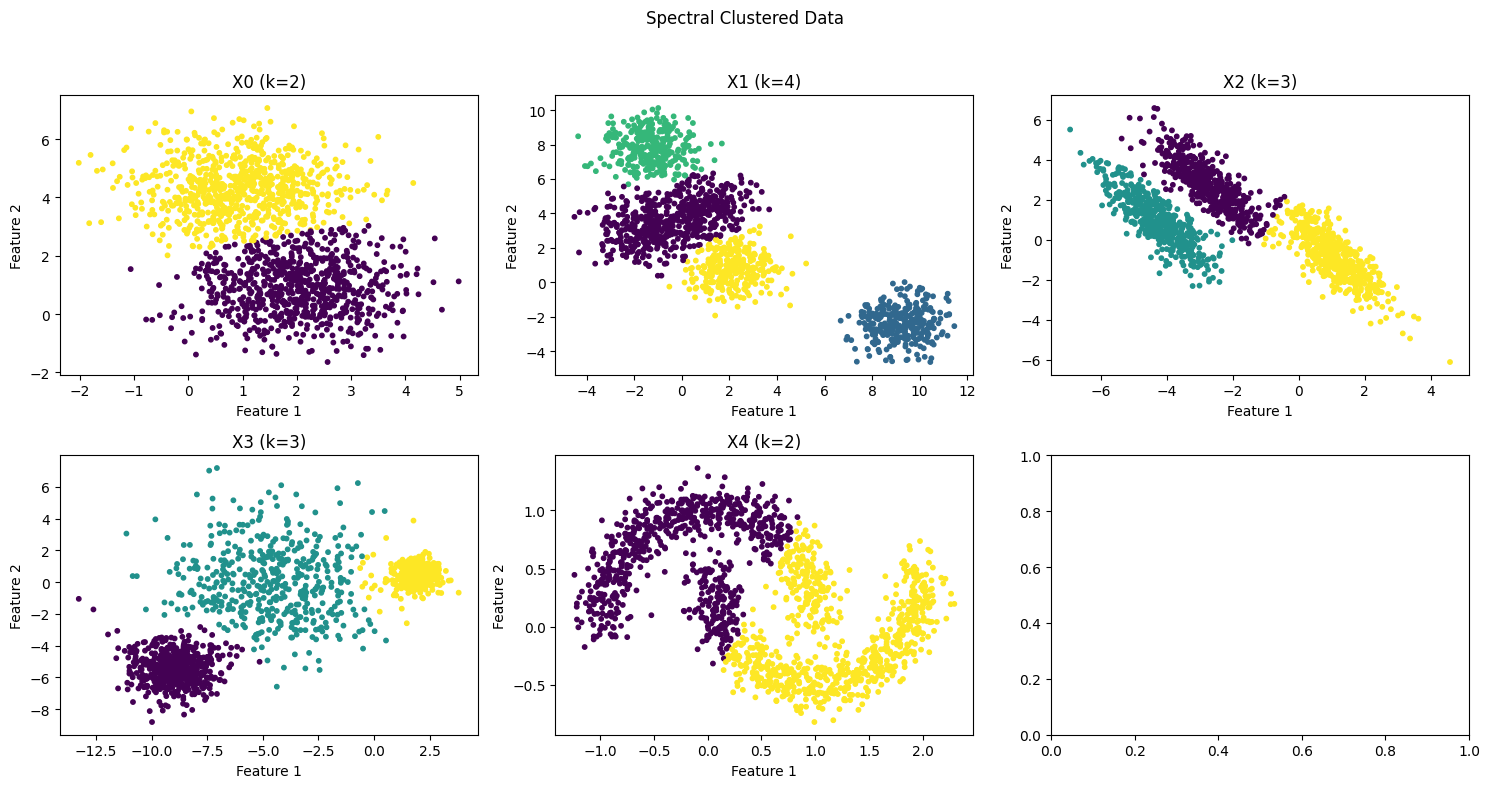

In [8]:
#### SPECTRAL CLUSTERING ####

from sklearn.cluster import SpectralClustering as spc

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Spectral Clustered Data')

# Iterate over datasets and corresponding best k values
for i, (dataset, n) in enumerate(zip(X, best_kmeans)):
    # Fit the specified spectral clustering model
    spectral = spc(n_clusters=n)
    cluster_assignments = spectral.fit_predict(dataset)
    
    # Plot the clustered data on the corresponding subplot
    row = i // 3
    col = i % 3
    axes[row, col].scatter(dataset[:, 0], dataset[:, 1], c=cluster_assignments, cmap='viridis', s=10)
    axes[row, col].set_title(f'X{i} (k={n})')
    axes[row, col].set_xlabel('Feature 1')
    axes[row, col].set_ylabel('Feature 2')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Dimensionality Reduction
Here we use Principal Components Analysis (PCA) and t-distributed stochastic neighbor embedding (t-SNE) to reduce the dimensionality of the dataset. Then we will compare the two techniques and assess which tended to cluster best.

In [ ]:
################################
# Load the data
################################
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# load dataset
digits = datasets.load_digits()
n_sample = digits.target.shape[0]
n_feature = digits.images.shape[1] * digits.images.shape[2]
X_digits = np.zeros((n_sample, n_feature))
for i in range(n_sample):
    X_digits[i, :] = digits.images[i, :, :].flatten()
y_digits = digits.target

In [ ]:
# Find the dimensions of the dataset
num_samples, num_features = X_digits.shape

print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

In [ ]:
# Apply PCA
n_components = 2  # Number of components for PCA
pca = PCA(n_components = n_components)
X_pca = pca.fit_transform(X_digits)

# Plot the data in 2D space with labels
plt.figure(figsize=(7.5, 6))

for i in range(10):
    indices = (y_digits == i)
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=str(i), s=20)

plt.title('PCA of Digits Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Validation: cumulative fraction of variance explained by principal components.

In [ ]:
# Apply PCA
pca1 = PCA()
pca1.fit(X_digits)

# Calculate cumulative fraction of variance explained
cumulative_var_ratio = np.cumsum(pca1.explained_variance_ratio_)

# Plot the cumulative fraction of variance explained
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='.', linestyle='-')
plt.title('Cumulative Fraction of Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Fraction of Variance Explained')
plt.grid(True)
plt.show()

In [ ]:
# Get the fraction of variance explained by the first 2 principal components
fraction_variance_explained = pca.explained_variance_ratio_

# Print the result
print("Fraction of Variance Explained by the First 2 Principal Components:")
print(f"Principal Component 1: {fraction_variance_explained[0]:.4f}")
print(f"Principal Component 2: {fraction_variance_explained[1]:.4f}")
print(f"Total Cumulative Variance Unexplained: {(1-(fraction_variance_explained[0] + fraction_variance_explained[1])): .4f}")

t-SNE

In [ ]:
# Apply t-SNE
tsne = TSNE(n_components=2, 
            perplexity = 25, 
            n_iter = 500,
            random_state=0
           )
X_tsne = tsne.fit_transform(X_digits)

# Plot the data in 2D with associated labels
plt.figure(figsize=(7.5, 6))

for i in range(10):
    indices = (y_digits == i)
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=str(i), s=15)

plt.title('t-SNE of Digits Dataset (2D) with True Labels')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()